If there are 2 independent variable. If they have some interaction. How to incorporate this effect of interction onto the dependent variable

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Q1

In [3]:
tbl = pd.read_excel('Tyler.xlsx')
tbl.head()

,Price,AdvertisingExpenditure($1000s),Sales(1000s)
0,2.0,50,478
1,2.5,50,373
2,3.0,50,335
3,2.0,50,473
4,2.5,50,358


Text(0.5, 0, 'x1')

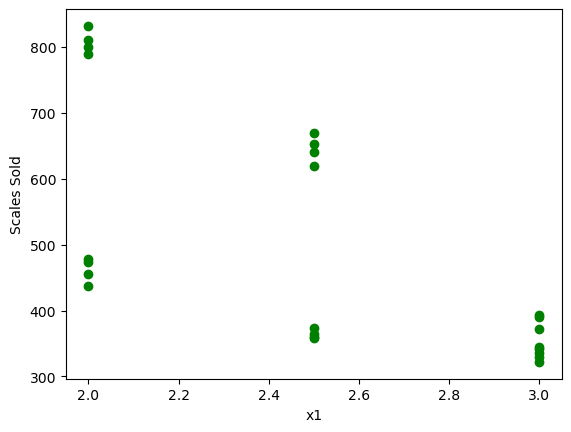

In [4]:
plt.scatter(tbl['Price'],tbl['Sales(1000s)'],color="green")
plt.ylabel('Scales Sold')
plt.xlabel('x1')
# sales in decreasing trend
# Why decreasing? Threr is noeffect of amount on expenditure when x1 increases

Text(0.5, 0, 'x2')

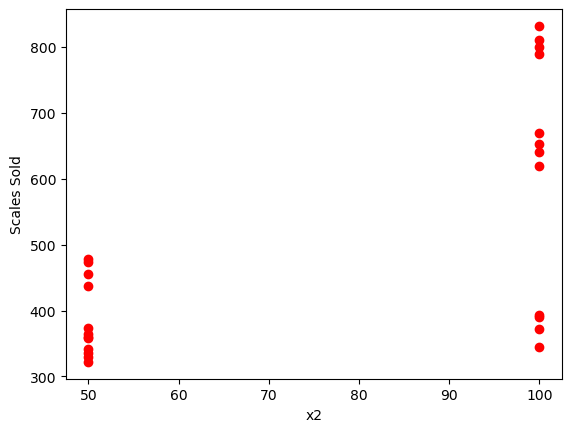

In [5]:
plt.scatter(tbl['AdvertisingExpenditure($1000s)'], tbl['Sales(1000s)'], color="red")
plt.ylabel('Scales Sold')
plt.xlabel('x2')

In [6]:
# interaction
z1 = tbl['AdvertisingExpenditure($1000s)']
z2 = tbl['Price']
z3 = z1*z2 # joint effect

In [7]:
x_new = np.column_stack((z1,z2,z3))
y = tbl['Sales(1000s)']
xnew2 = sm.add_constant(x_new)
model2 = sm.OLS(y, xnew2)
Model2 = model2.fit()
print(Model2.summary())
# x1 and x2 are independent variable and x3 is interaction

                            OLS Regression Results                            
Dep. Variable:           Sales(1000s)   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     297.9
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           9.26e-17
Time:                        11:16:00   Log-Likelihood:                -111.99
No. Observations:                  24   AIC:                             232.0
Df Residuals:                      20   BIC:                             236.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -275.8333    112.842     -2.444      0.0

# Q2

In [10]:
tbl2 = pd.read_excel('ramb2.xlsx')
tbl2

,MilesPerGallon,Weight
0,28.7,2289
1,29.2,2113
2,34.2,2180
3,27.9,2448
4,33.3,2026
5,26.4,2702
6,23.9,2657
7,30.5,2106
8,18.1,3226
9,19.5,3213


Text(0.5, 0, 'Weight')

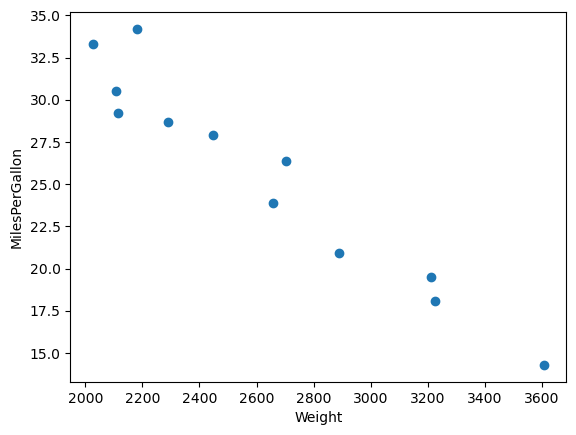

In [11]:
#Scatter Diagram
plt.scatter(tbl2['Weight'], tbl2['MilesPerGallon'])
plt.ylabel('MilesPerGallon')
plt.xlabel('Weight')

In [12]:
# Model1
x = tbl2['Weight']
y = tbl2['MilesPerGallon']
x2 = sm.add_constant(x)
model = sm.OLS(y,x2)
Model = model.fit()
print(Model.summary())

                            OLS Regression Results                            
Dep. Variable:         MilesPerGallon   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.8
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           2.85e-07
Time:                        11:26:17   Log-Likelihood:                -22.091
No. Observations:                  12   AIC:                             48.18
Df Residuals:                      10   BIC:                             49.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.0957      2.582     21.725      0.0

D:\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
#Standardized Residual Plot for 1st order model
E2 = Model.resid_pearson
E2

array([-0.44511273, -1.37252481,  2.08753315,  0.18422536,  0.47540179,
        1.05668329, -0.75350063, -0.64311699, -0.25953343,  0.4879158 ,
        0.12130227, -0.93927307])

In [17]:
yhat2 = Model.predict(x2)
yhat2

0     29.443573
1     31.492839
2     30.712721
3     27.592247
4     32.505829
5     24.634783
6     25.158743
7     31.574344
8     18.533557
9     18.684924
10    14.097361
11    22.469081
dtype: float64

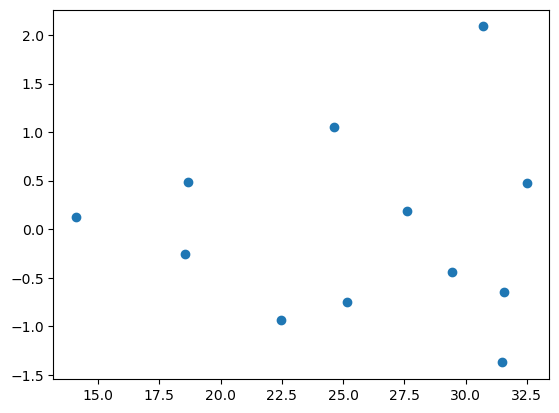

In [18]:
plt.scatter(yhat,E2)

In [19]:
# Residual plot after taking log on dependent variables
# for more details refer screenshots
Y = np.log(y) # new variable

model3 = sm.OLS(Y,x2)
Model3 = model3.fit()
print(Model3.summary())

                            OLS Regression Results                            
Dep. Variable:         MilesPerGallon   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     181.2
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           9.84e-08
Time:                        11:31:22   Log-Likelihood:                 17.005
No. Observations:                  12   AIC:                            -30.01
Df Residuals:                      10   BIC:                            -29.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5242      0.099     45.553      0.0

D:\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [23]:
# Residual plot for model 2
E3 = Model3.resid_pearson
E3

array([-0.31630114, -1.42005514,  1.5623004 ,  0.48370101, -0.0537228 ,
        1.60448776, -0.29474869, -0.79674991, -0.18335787,  0.87474775,
       -0.87956572, -0.58073564])

In [24]:
yhat = Model3.predict(x2)
yhat

0     3.377221
1     3.465414
2     3.431840
3     3.297547
4     3.509009
5     3.170268
6     3.192817
7     3.468922
8     2.907694
9     2.914208
10    2.716776
11    3.077064
dtype: float64

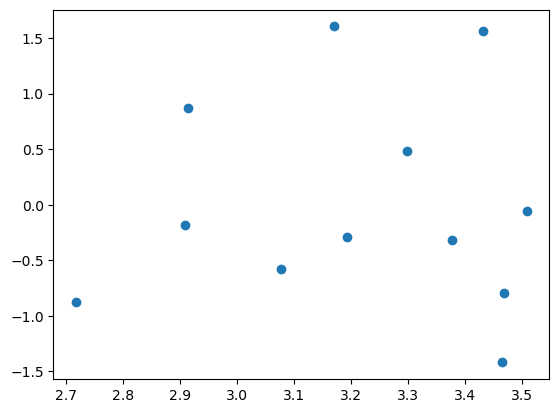

In [25]:
plt.scatter(yhat,E3)
# no conical shape and rectangle shape is appearing 
# be careful while interpreting the answer bcoz is not y it is log(y)